In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


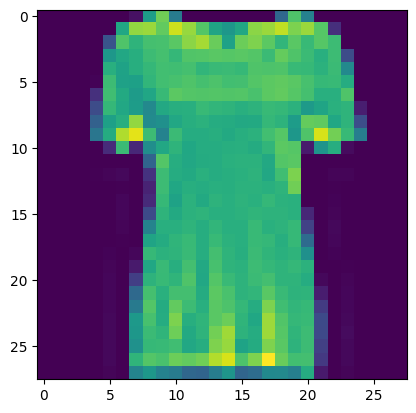

In [6]:
plt.imshow(x_train[10])

In [8]:
y_train[10]

0

In [9]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(units=3024, activation="relu"),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=1064, activation="relu"),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=512, activation="relu"),
    keras.layers.Dropout(.1),
    keras.layers.Dense(units=255, activation="relu"),
    keras.layers.Dense(units=164, activation="relu"),
    keras.layers.Dense(units=10, activation="softmax"),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 3024)              2373840   
                                                                 
 dropout (Dropout)           (None, 3024)              0         
                                                                 
 dense_1 (Dense)             (None, 1064)              3218600   
                                                                 
 dropout_1 (Dropout)         (None, 1064)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               545280    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

**(2) Define the methods for weight and bias value updations (optimizatios techniques,error methon,evaluation metrics)**

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train_scaled,y_train,epochs=12,validation_data=(x_test_scaled,y_test))

Epoch 1/12
1875/1875 [==============================] - 14s 5ms/step - loss: 0.5440 - accuracy: 0.8031 - val_loss: 0.4825 - val_accuracy: 0.8406
Epoch 2/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4075 - accuracy: 0.8551 - val_loss: 0.3999 - val_accuracy: 0.8552
Epoch 3/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3686 - accuracy: 0.8684 - val_loss: 0.4099 - val_accuracy: 0.8493
Epoch 4/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3472 - accuracy: 0.8757 - val_loss: 0.3610 - val_accuracy: 0.8716
Epoch 5/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3269 - accuracy: 0.8821 - val_loss: 0.3776 - val_accuracy: 0.8687
Epoch 6/12
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3124 - accuracy: 0.8874 - val_loss: 0.3613 - val_accuracy: 0.8758
Epoch 7/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3014 - accuracy: 0.8902 - val_loss: 0.3622 - val_accur

**Convolutional Model**

In [7]:
model_1 = keras.Sequential([
    keras.layers.Conv2D(filters=1024,kernel_size=(3,3),padding="same",activation="relu",input_shape=(28,28,1)),
    keras.layers.MaxPool2D(padding="same"),
    keras.layers.Conv2D(filters=512,kernel_size=(3,3),padding="valid",activation="relu"),
    keras.layers.MaxPool2D(padding="valid"),
    keras.layers.Conv2D(filters=256,kernel_size=(3,3),padding="valid",activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=1024,activation="relu")
])